# Var Montecarlo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import funciones as fn
import yfinance as yf

Datos SPY

In [55]:
symbol = "SPY"                 
ticker = yf.Ticker(symbol)
data = ticker.history(start='2010-10-20',end='2015-10-20').Close.dropna()
returns = pd.DataFrame(np.log(data).diff().dropna())

In [56]:
returns

,Close
Date,
2010-10-20,0.009719
2010-10-21,0.002203
2010-10-22,0.001861
2010-10-25,0.002953
2010-10-26,0.000169
...,...
2015-10-13,-0.006322
2015-10-14,-0.004806
2015-10-15,0.015238


In [57]:
date_init = returns.iloc[-1].name  + pd.Timedelta('1d')

In [58]:
date_init

Timestamp('2015-10-20 00:00:00')

In [59]:
date_end = date_init + pd.Timedelta(30,'d')

In [61]:
date_end

Timestamp('2015-11-19 00:00:00')

In [62]:
time_index = pd.date_range(
    start=date_init, end=date_end, freq='B')

In [63]:
time_index

DatetimeIndex(['2015-10-20', '2015-10-21', '2015-10-22', '2015-10-23',
               '2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29',
               '2015-10-30', '2015-11-02', '2015-11-03', '2015-11-04',
               '2015-11-05', '2015-11-06', '2015-11-09', '2015-11-10',
               '2015-11-11', '2015-11-12', '2015-11-13', '2015-11-16',
               '2015-11-17', '2015-11-18', '2015-11-19'],
              dtype='datetime64[ns]', freq='B')

In [64]:
mean_data = returns.mean()
std_data = returns.std()

In [65]:
mean_data

Close    0.000522
dtype: float64

In [66]:
std_data

Close    0.00961
dtype: float64

In [67]:
datos_simulados = np.random.normal(
    loc=mean_data,
    scale=std_data,
    size=(len(time_index), 1000))

In [68]:
data_montecarlo = pd.DataFrame(datos_simulados,
    index=time_index)

In [69]:
data_montecarlo

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2015-10-20,0.002662,0.009412,0.004871,-0.001128,-0.004387,0.010798,-0.006155,0.017166,0.011996,-0.003233,...,0.001035,0.023482,0.013625,0.000698,-0.019284,-0.008413,-0.015895,-0.005176,0.002536,0.001810
2015-10-21,-0.014193,-0.006018,0.013493,0.012261,0.005914,0.007901,-0.015542,0.009578,0.000426,0.002542,...,0.006822,0.005928,0.008330,-0.001252,-0.010299,-0.013518,0.000738,0.016516,-0.010182,-0.002715
2015-10-22,-0.002865,0.014942,0.002135,-0.002206,-0.012982,0.004683,0.008575,0.012356,-0.012844,-0.001087,...,0.011540,0.012046,0.008001,-0.008955,0.005103,-0.011011,0.012593,0.001760,-0.002243,-0.018120
2015-10-23,-0.007108,0.002421,0.010907,0.001590,0.010773,0.012982,-0.007935,-0.006346,-0.010534,0.014624,...,0.014719,-0.005527,-0.016182,-0.013216,-0.007452,0.002782,-0.002821,-0.012762,-0.011428,0.001537
2015-10-26,-0.013940,-0.001695,0.009099,0.004787,0.002007,0.001133,-0.005401,0.012370,0.002549,0.010438,...,-0.009142,0.003827,-0.013150,0.005878,0.003057,0.001954,-0.002861,0.002996,0.011125,0.007211
2015-10-27,0.004916,0.003497,-0.008360,0.017857,-0.014902,0.003842,-0.002034,-0.002419,0.002621,-0.012344,...,-0.005179,-0.007550,-0.015434,0.000142,-0.010422,-0.011544,0.007526,0.001092,0.009569,0.008468
2015-10-28,0.003110,0.002289,0.002019,-0.013095,0.000412,0.007357,-0.000607,0.024489,-0.006632,0.006975,...,0.000623,0.004025,-0.000276,0.013077,-0.016482,-0.004085,-0.005225,-0.006004,-0.013667,-0.005923
2015-10-29,0.013065,0.014553,-0.013567,-0.008446,0.011076,-0.005156,0.005143,0.008519,0.000750,0.015731,...,0.012559,-0.011912,0.012886,-0.008452,0.003497,0.015767,0.014384,-0.019278,0.002233,-0.000683
2015-10-30,0.006167,0.001654,-0.007651,-0.008270,0.000160,0.009295,0.010473,0.009207,-0.001986,0.022652,...,0.004746,0.002538,-0.007168,0.007405,-0.005854,0.007464,0.004996,0.006514,0.000606,-0.004398
2015-11-02,-0.002039,0.007858,0.000548,0.011766,0.006159,0.000737,-0.011697,-0.005364,-0.018959,0.015688,...,0.013033,0.006388,0.008552,0.003564,-0.006247,0.010641,0.004839,-0.011782,-0.001408,-0.008793


In [73]:
data_montecarlo.cumsum()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2015-10-20,0.002662,0.009412,0.004871,-0.001128,-0.004387,0.010798,-0.006155,0.017166,0.011996,-0.003233,...,0.001035,0.023482,0.013625,0.000698,-0.019284,-0.008413,-0.015895,-0.005176,0.002536,0.001810
2015-10-21,-0.011531,0.003395,0.018364,0.011133,0.001527,0.018699,-0.021698,0.026743,0.012422,-0.000692,...,0.007857,0.029410,0.021955,-0.000554,-0.029583,-0.021931,-0.015157,0.011340,-0.007646,-0.000906
2015-10-22,-0.014396,0.018337,0.020499,0.008928,-0.011454,0.023382,-0.013123,0.039099,-0.000422,-0.001779,...,0.019397,0.041455,0.029956,-0.009509,-0.024480,-0.032942,-0.002563,0.013100,-0.009889,-0.019025
2015-10-23,-0.021503,0.020758,0.031406,0.010518,-0.000681,0.036364,-0.021058,0.032753,-0.010956,0.012846,...,0.034116,0.035928,0.013774,-0.022725,-0.031932,-0.030160,-0.005384,0.000338,-0.021317,-0.017489
2015-10-26,-0.035443,0.019062,0.040505,0.015305,0.001325,0.037497,-0.026459,0.045123,-0.008407,0.023284,...,0.024974,0.039755,0.000624,-0.016847,-0.028875,-0.028206,-0.008245,0.003333,-0.010192,-0.010277
2015-10-27,-0.030527,0.022560,0.032145,0.033162,-0.013577,0.041339,-0.028494,0.042704,-0.005786,0.010940,...,0.019795,0.032206,-0.014810,-0.016705,-0.039298,-0.039750,-0.000719,0.004426,-0.000623,-0.001809
2015-10-28,-0.027417,0.024848,0.034164,0.020066,-0.013165,0.048696,-0.029101,0.067193,-0.012418,0.017915,...,0.020418,0.036230,-0.015086,-0.003627,-0.055780,-0.043835,-0.005944,-0.001578,-0.014290,-0.007732
2015-10-29,-0.014352,0.039401,0.020597,0.011621,-0.002088,0.043540,-0.023958,0.075712,-0.011668,0.033647,...,0.032977,0.024318,-0.002200,-0.012079,-0.052283,-0.028068,0.008440,-0.020856,-0.012058,-0.008416
2015-10-30,-0.008185,0.041055,0.012946,0.003350,-0.001928,0.052835,-0.013485,0.084919,-0.013654,0.056299,...,0.037722,0.026856,-0.009368,-0.004674,-0.058137,-0.020604,0.013436,-0.014342,-0.011452,-0.012813
2015-11-02,-0.010224,0.048913,0.013494,0.015116,0.004230,0.053572,-0.025181,0.079555,-0.032613,0.071987,...,0.050755,0.033244,-0.000816,-0.001110,-0.064385,-0.009963,0.018275,-0.026124,-0.012860,-0.021607


In [71]:
montecarlo_temp_evol = data_montecarlo.cumsum()
montecarlo_temp_evol = np.exp(montecarlo_temp_evol)

In [72]:
montecarlo_temp_evol

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2015-10-20,1.002666,1.009457,1.004883,0.998873,0.995623,1.010857,0.993864,1.017314,1.012068,0.996772,...,1.001036,1.023760,1.013718,1.000699,0.980901,0.991622,0.984231,0.994838,1.002539,1.001811
2015-10-21,0.988535,1.003401,1.018533,1.011196,1.001529,1.018875,0.978536,1.027104,1.012500,0.999309,...,1.007888,1.029846,1.022198,0.999446,0.970850,0.978308,0.984958,1.011405,0.992383,0.999095
2015-10-22,0.985708,1.018506,1.020710,1.008968,0.988611,1.023657,0.986963,1.039874,0.999578,0.998223,...,1.019586,1.042327,1.030409,0.990536,0.975817,0.967595,0.997440,1.013186,0.990160,0.981154
2015-10-23,0.978726,1.020975,1.031904,1.010574,0.999319,1.037033,0.979162,1.033296,0.989104,1.012928,...,1.034704,1.036581,1.013869,0.977531,0.968572,0.970290,0.994630,1.000338,0.978909,0.982663
2015-10-26,0.965177,1.019245,1.041337,1.015423,1.001326,1.038209,0.973888,1.046157,0.991628,1.023557,...,1.025288,1.040556,1.000624,0.983294,0.971537,0.972189,0.991789,1.003339,0.989860,0.989775
2015-10-27,0.969934,1.022816,1.032667,1.033718,0.986515,1.042205,0.971908,1.043629,0.994230,1.011000,...,1.019992,1.032730,0.985299,0.983434,0.961464,0.961030,0.999281,1.004436,0.999377,0.998193
2015-10-28,0.972956,1.025159,1.034754,1.020269,0.986922,1.049901,0.971319,1.069502,0.987658,1.018077,...,1.020628,1.036895,0.985027,0.996379,0.945747,0.957112,0.994074,0.998423,0.985811,0.992297
2015-10-29,0.985751,1.040187,1.020811,1.011688,0.997914,1.044502,0.976327,1.078652,0.988400,1.034219,...,1.033526,1.024616,0.997802,0.987993,0.949060,0.972322,1.008476,0.979360,0.988015,0.991619
2015-10-30,0.991848,1.041909,1.013030,1.003356,0.998073,1.054256,0.986606,1.088629,0.986439,1.057914,...,1.038443,1.027220,0.990676,0.995337,0.943520,0.979606,1.013526,0.985761,0.988613,0.987268
2015-11-02,0.989828,1.050129,1.013585,1.015231,1.004239,1.055033,0.975133,1.082805,0.967913,1.074641,...,1.052065,1.033803,0.999185,0.998891,0.937644,0.990086,1.018443,0.974215,0.987223,0.978625


In [93]:
pct_seg = 0.95

conf_level = 1-pct_seg

simulacion = montecarlo_temp_evol.quantile(q=conf_level,axis=1)

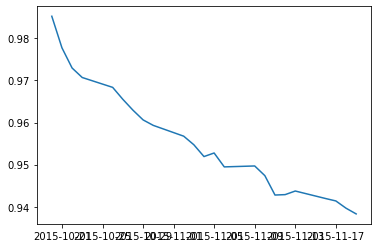

In [94]:
plt.plot(simulacion)